<a href="https://colab.research.google.com/github/franciscoerramuspe/pytorch_guide/blob/main/ModelEvaluation_HyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Now, we will asign 30 features to a numpy array. Using a LabelEncoder object, we will transform the class labels from their original representation ("M" and "B") into integers

In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
X = df.loc[:, 2:].values # returns everything from the third column onwards, for all the rows, in a simple list form
y = df.loc[:, 1].values # returns everything from the second column columnonwards, in a simple list form

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

After encoding the class labels (diagnosis) in an array y, the malignant tumors are now represented as class 1, and the benign tumors are represented as class 0.

In [7]:
le.transform(['M', "B"])

array([1, 0])

Divide dataset into a separate training dataset (80% of total data) and a test dataset(20% of total data)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.20,
                   stratify=y,
                   random_state=1
                   )

Instead of going through the model fitting and data transformation, let's chain the StandardScaler, PCA, and LogisticRegrssion objects in a pipeline

In [9]:
# Import necessary libraries for data scaling, dimensionality reduction, and classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a machine learning pipeline that does the following in sequence:
# 1. Sta1.
#    This is often a good practice to help the model perform better.
# 2. PCA(n_components=2) - Use Principal Component Analysis to reduce the data's dimensions to 2.
#    This simplifies the data while retaining essential features, making computations faster and possibly more accurate.
# 3. LogisticRegression() - Apply Logistic Regression for classification. It's a method used for binary classification tasks.

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

# Train the pipeline with the training data.
# X_train contains the features, y_train contains the corresponding labels.
pipe_lr.fit(X_train, y_train)

# Predict the labels of the test data.
# X_test contains new, unseen features.
y_pred = pipe_lr.predict(X_test)

# Calculate the accuracy of the model on the test data.
# It compares the predicted labels (y_pred) with the actual labels (y_test).
test_acc = pipe_lr.score(X_test, y_test)

# Print the test accuracy, formatted to three decimal places.
print(f'Test accuracy: {test_acc:.3f}')


Test accuracy: 0.956


##Pipeline object workflow
![](https://drive.google.com/uc?export=view&id=1XY42H6ok0TzLRE7akIQGBqD7pnwQTzFY)

A good way of using the holdout method for model selection is toseparate the data into three parts: a training dataset, a validation dataset and a test dataset. The advantage of having a test dataset that the model hasn't seen before during the training and model selection steps is that we can obtain a less biased estimate of its ability to generalize to new data.
![](https://drive.google.com/uc?export=view&id=1tPduKaFhmeofmVwJ264siMZSdS_PAWim)

## Using K-fold cross validation
Typically, we use k-fold cross-validation for model tuning , that is, is estimated from evaluating finding the optimal hyperparameter values that yield a satisfying generalization performance, which is estimated from evaluating the model performance on the test fold.
Once satisfactory hyperparameter values are foun, we can retain the model on the complete training dataset and obtain a final performance estimate using the independent test dataset.
In the example below (k=10) the training dataset is divided into 10 folds, and during 10 iterations, 9 folds are used for training, and 1 fold will be used as the test dataset for model evaluation.
![](https://drive.google.com/uc?export=view&id=1rHLsrrnEJlVr4Dkscq2bSzX2T7BFrVfu)
The estimated performances (E[i]) for each fold are then used to estimate average performance, E, of the model

In [10]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold for cross-validation with 10 folds.
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

# Loop through each fold produced by StratifiedKFold
for k, (train, test) in enumerate(kfold):
  # 'k' is the index of the current fold, starting from 0. When we print, we add 1 to start counting folds from 1.

  # 'train' is an array of indices for the training data in the current fold.
  # You use these indices to select rows from X_train and y_train for training.

  # 'test' is an array of indices for the testing data in the current fold.
  # Similar to 'train', these indices are used to select rows from X_train and y_train for testing.

  # Fit the pipeline on the training set of the current fold
  pipe_lr.fit(X_train[train], y_train[train])

  # Calculate and store the accuracy score of the pipeline on the test set of the current fold
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)

  # Print detailed information about the current fold:
  # - Fold number ('k+1' because 'k' starts at 0)
  # - Distribution of class labels in the training set of the current fold, using 'np.bincount'
  # - Accuracy score of the model on the test set of the current fold
  print(f'Fold: {k+1:02d}, '
        f'Class distr.: {np.bincount(y_train[train])}, '
        f'Acc.: {score:.3f}')


Fold: 01, Class distr.: [256 153], Acc.: 0.935
Fold: 02, Class distr.: [256 153], Acc.: 0.935
Fold: 03, Class distr.: [256 153], Acc.: 0.957
Fold: 04, Class distr.: [256 153], Acc.: 0.957
Fold: 05, Class distr.: [256 153], Acc.: 0.935
Fold: 06, Class distr.: [257 153], Acc.: 0.956
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.933
Fold: 09, Class distr.: [257 153], Acc.: 0.956
Fold: 10, Class distr.: [257 153], Acc.: 0.956


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [12]:
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy: 0.950 +/- 0.014


* Learning curves and validation curves are useful tools to help us improve the performance of our ML algorithms
* Here we would use the leraning curve to evaluate the model

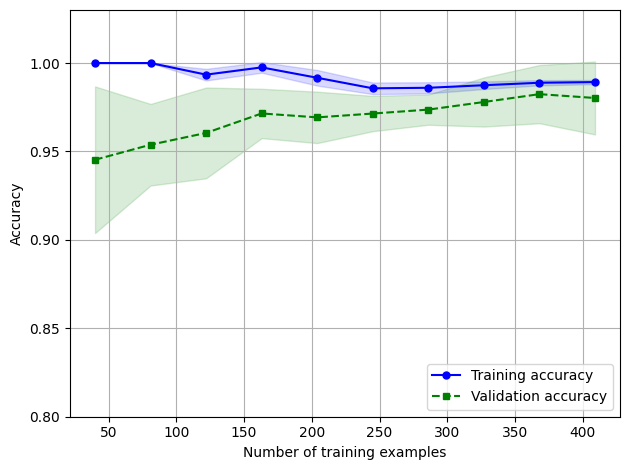

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores =                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()
